In [6]:
print("Hello World")

Hello World


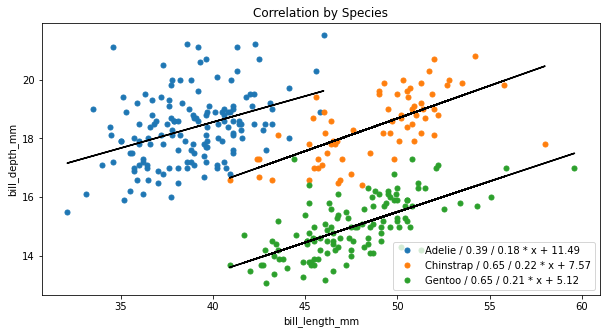

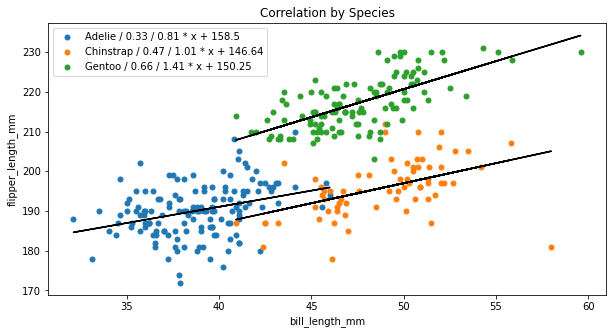

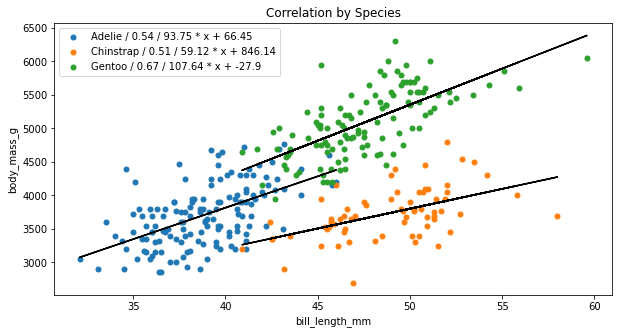

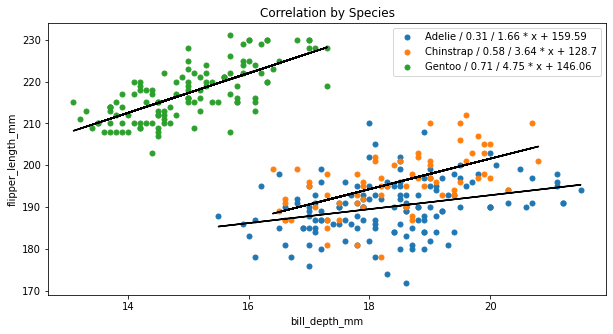

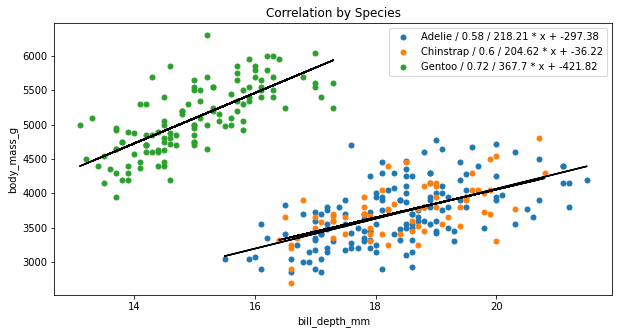

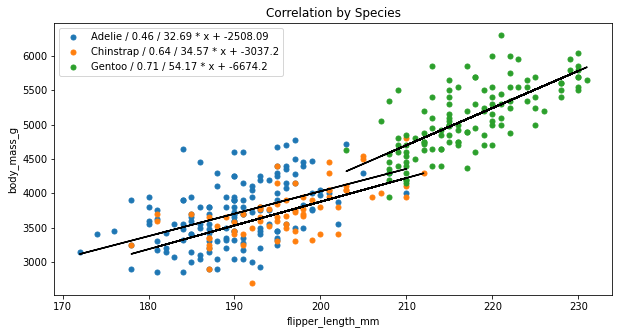

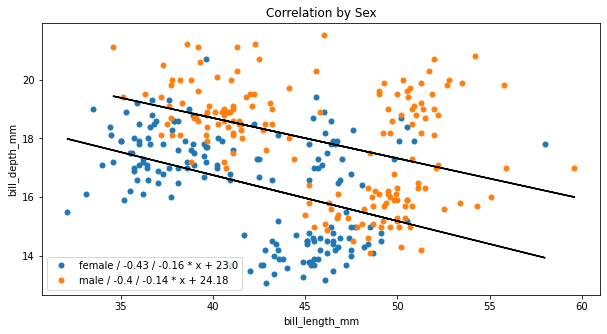

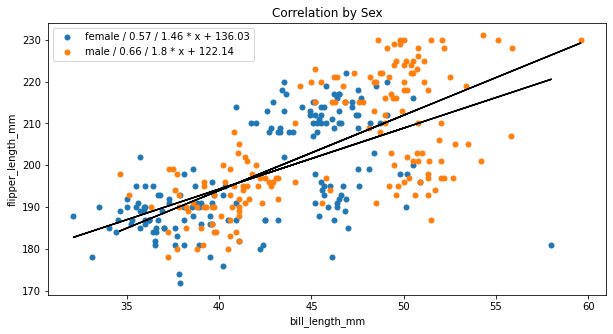

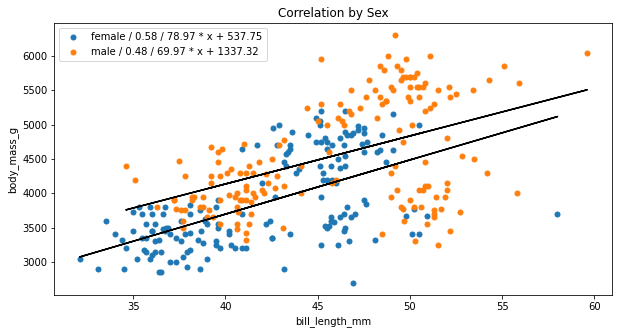

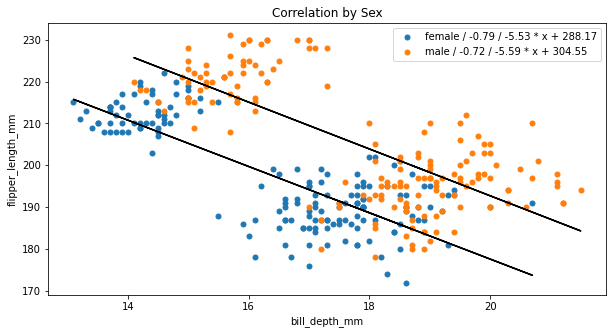

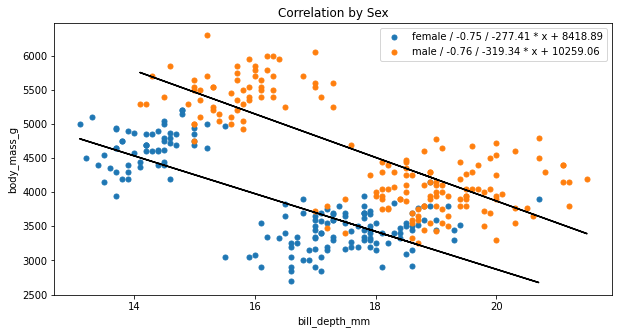

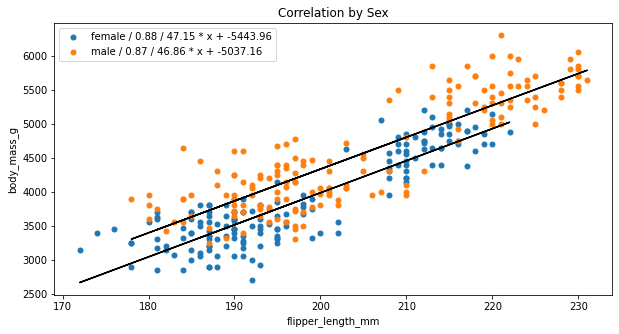

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

penguins = pd.read_csv("penguins.csv").dropna().reset_index().drop(columns=["Unnamed: 0", "index"])
show = True

# Correlation Graphics
def scatterSexSpecies(xAxis, yAxis):
    plt.figure(figsize=(10,5), dpi=150)
    
    # Add Data to Plot
    axes = plt.subplot()

    for species, group in penguins.groupby(["sex", "species"]):
        #print(group["species"])
        k, d = np.polyfit(group[xAxis], group[yAxis], 1)
        corr = str(round(group.corr().loc[xAxis, yAxis], 2))
        roundedK = str(round(k, 2))
        roundedD = str(round(d, 2))
        #text = species + " / " + corr + " / " + roundedK + " * x + " + roundedD
        axes.plot(group[xAxis], group[yAxis], marker='o', linestyle='', ms=5)

    # Add Linear Regression to Plot
    for species, group in penguins.groupby(["sex", "species"]):
        slope, intercept = np.polyfit(penguins[xAxis], penguins[yAxis], 1)
        plt.plot(penguins[xAxis], slope * penguins[xAxis] + intercept, color="black")

    # Add Correlation and Linear Regression - just text
    plt.plot([], [], " ", label="Correlation: " + str(round(penguins[[xAxis, yAxis]].corr().iloc[1, 0], 2)))
    plt.plot([], [], " ", label="Linear Regression: " + str(round(slope, 2)) + "x+" + str(round(intercept, 2)))

    # Add Labels to Plot
    plt.xlabel(xAxis)
    plt.ylabel(yAxis)

    axes.legend()
    plt.show()


def scatter_by_species(xAxis, yAxis): 

    # color by species
    speciesGroups = penguins.groupby("species")

    # regression
    fig,ax = plt.subplots(figsize=(10,5))
    for species, group in speciesGroups:
        k, d = np.polyfit(group[xAxis], group[yAxis], 1)
        corr = str(round(group.corr().loc[xAxis, yAxis], 2))
        roundedK = str(round(k, 2))
        roundedD = str(round(d, 2))
        text = species + " / " + corr + " / " + roundedK + " * x + " + roundedD
        ax.plot(group[xAxis], group[yAxis], marker='o', linestyle='', ms=5, label=text)

    for species, group in speciesGroups:        
        k, d = np.polyfit(group[xAxis], group[yAxis], 1)
        plt.plot(group[xAxis], k * group[xAxis] + d, color="black")

    ax.legend()
    plt.title("Correlation by Species")
    plt.xlabel(xAxis)
    plt.ylabel(yAxis)
    plt.show()

def scatter_by_sex(xAxis, yAxis): 

    # color by species
    speciesGroups = penguins.groupby("sex")

    # regression
    fig,ax = plt.subplots(figsize=(10,5))
    for species, group in speciesGroups:
        k, d = np.polyfit(group[xAxis], group[yAxis], 1)
        corr = str(round(group.corr().loc[xAxis, yAxis], 2))
        roundedK = str(round(k, 2))
        roundedD = str(round(d, 2))
        text = species + " / " + corr + " / " + roundedK + " * x + " + roundedD
        ax.plot(group[xAxis], group[yAxis], marker='o', linestyle='', ms=5, label=text)

    for species, group in speciesGroups:        
        k, d = np.polyfit(group[xAxis], group[yAxis], 1)
        plt.plot(group[xAxis], k * group[xAxis] + d, color="black")

    ax.legend()
    plt.title("Correlation by Sex")
    plt.xlabel(xAxis)
    plt.ylabel(yAxis)
    plt.show()

def scatterIslandSpecies(xAxis, yAxis):
    # Add Data to Plot
    axes = plt.subplot()

    for species, group in penguins.groupby(["island", "species"]):
        #print(group["species"])
        axes.plot(group[xAxis], group[yAxis], marker='o', linestyle='', ms=5, label=species)

    # Add Linear Regression to Plot
    slope, intercept = np.polyfit(penguins[xAxis], penguins[yAxis], 1)
    plt.plot(penguins[xAxis], slope * penguins[xAxis] + intercept)

    # Add Correlation and Linear Regression
    plt.plot([], [], " ", label="Correlation: " + str(round(penguins[[xAxis, yAxis]].corr().iloc[1, 0], 2)))
    plt.plot([], [], " ", label="Linear Regression: " + str(round(slope, 2)) + "x+" + str(round(intercept, 2)))

    # Add Labels to Plot
    plt.xlabel(xAxis)
    plt.ylabel(yAxis)

    plt.legend()
    plt.show()


if show:
    scatter_by_species("bill_length_mm", "bill_depth_mm")
    scatter_by_species("bill_length_mm", "flipper_length_mm")
    scatter_by_species("bill_length_mm", "body_mass_g")
    scatter_by_species("bill_depth_mm", "flipper_length_mm")
    scatter_by_species("bill_depth_mm", "body_mass_g")
    scatter_by_species("flipper_length_mm", "body_mass_g")

    
    scatter_by_sex("bill_length_mm", "bill_depth_mm")
    scatter_by_sex("bill_length_mm", "flipper_length_mm")
    scatter_by_sex("bill_length_mm", "body_mass_g")
    scatter_by_sex("bill_depth_mm", "flipper_length_mm")
    scatter_by_sex("bill_depth_mm", "body_mass_g")
    scatter_by_sex("flipper_length_mm", "body_mass_g")
else:
    scatterIslandSpecies("bill_length_mm", "bill_depth_mm")
    scatterIslandSpecies("bill_length_mm", "flipper_length_mm")
    scatterIslandSpecies("bill_length_mm", "body_mass_g")
    scatterIslandSpecies("bill_depth_mm", "flipper_length_mm")
    scatterIslandSpecies("bill_depth_mm", "body_mass_g")
    scatterIslandSpecies("flipper_length_mm", "body_mass_g")


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,333.00,333.00,333.00,333.00,333.00
mean,43.99,17.16,200.97,4207.06,2008.04
std,5.47,1.97,14.02,805.22,0.81
min,32.10,13.10,172.00,2700.00,2007.00
25%,39.50,15.60,190.00,3550.00,2007.00
50%,44.50,17.30,197.00,4050.00,2008.00
75%,48.60,18.70,213.00,4775.00,2009.00
max,59.60,21.50,231.00,6300.00,2009.00


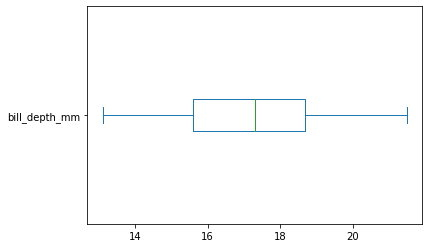

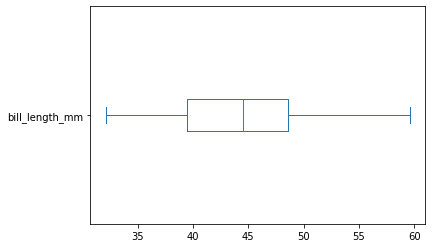

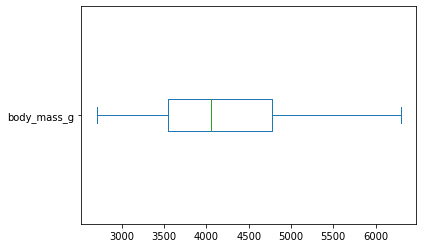

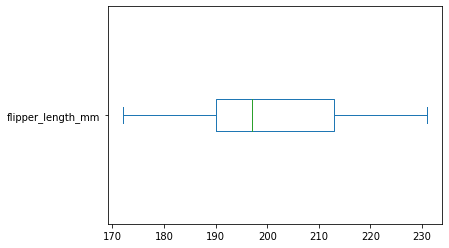

In [10]:

penguins.plot.box(vert=False, column="bill_depth_mm")
penguins.plot.box(vert=False, column="bill_length_mm")
penguins.plot.box(vert=False, column="body_mass_g")
penguins.plot.box(vert=False, column="flipper_length_mm")
penguins.describe().round(2)